# Projet 5 - Segmentation des Clients d'un Site E-Commerce
## Partie 3 de 3

# 1. Résumé

L'objectif du projet est de segmenter des clients du site e-commerce, ce qu'inclu :

* **comprendre les différents types d’utilisateurs** grâce à leur comportement et à leurs données personnelles
* fournir à l’équipe marketing **une description actionable de la segmentation** et de sa logique sous-jacente pour une utilisation optimale
* **proposer un contrat de maintenance** basée sur une analyse de la stabilité des segments au cours du temps

Dans le premier notebook du projet on a consolidé les informations sur les commandes et les clients dans deux datasets. On a aussi fait un nettoyage et un exploration des données pour ce préparer au modélisation.
Dans le deuxième notebook, on a testé plusieurs modèles avec des différents features et nombre de clusters.
**Dans ce notebook, on fait une analyse de la stabilité des segments au cours du temps du modèle proposé.**

# 2. Les Imports

## 2.1 Les Bibliothèques et Styles

In [1]:
#imports: regular expresssions, operating system, math operations
#import re,os,math
import re, os, random, datetime
#from math import sin, cos, sqrt, atan2, radians, degrees
#from cmath import rect, phase
from ast import literal_eval

#data modules
import numpy as np
import pandas as pd
import scipy as sp


#graphic modules
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.colors import ListedColormap

import seaborn as sns

In [2]:
#les functions de sklearn
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, FactorAnalysis, KernelPCA
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.manifold import MDS, Isomap, LocallyLinearEmbedding, TSNE
from sklearn.mixture import GaussianMixture
from sklearn.base import clone

from sklearn import metrics

In [3]:
sns.set() #sets the theme of seaborn
#creates static png images of the plots within the notebook (other option: 'notebook' for interactive plots)
%matplotlib inline 

## 2.2 Les Données

In [4]:
PATH_TO_DATA = os.getcwd() + '\\DataCleaned\\'
orders_df = pd.read_csv(PATH_TO_DATA + 'Olist_Cleaned_Orders' + '.csv')

In [5]:
orders_df

,Unnamed: 0,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,...,used_boleto,used_card,order_payment_total,review_score,review_response_time,has_review_title,has_review_message,has_review,review_response_speed,review_answer_timestamp
0,0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33.000,2017-10-02 11:07:15.000,2017-10-04 19:55:00.000,2017-10-10 21:25:13.000,2017-10-18 00:00:00.000,7c396fd4830fd04220f754e42b4e5bff,...,False,True,38.71,4.0,1.155417,False,True,True,0.463947,2017-10-12 03:43:48.000
1,1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37.000,2018-07-26 03:24:27.000,2018-07-26 14:31:00.000,2018-08-07 15:27:45.000,2018-08-13 00:00:00.000,af07308b275d755c9edb36a90c618231,...,True,False,141.46,4.0,0.776273,True,True,True,0.562976,2018-08-08 18:37:50.000
2,2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49.000,2018-08-08 08:55:23.000,2018-08-08 13:50:00.000,2018-08-17 18:06:29.000,2018-09-04 00:00:00.000,3a653a41f6f9fc3d2a113cf8398680e8,...,False,True,179.12,5.0,4.797199,False,False,True,0.172497,2018-08-22 19:07:58.000
3,3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06.000,2017-11-18 19:45:59.000,2017-11-22 13:39:59.000,2017-12-02 00:28:42.000,2017-12-15 00:00:00.000,7c142cf63193a1473d2e66489a9ae977,...,False,True,72.20,5.0,2.806921,False,True,True,0.262679,2017-12-05 19:21:58.000
4,4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39.000,2018-02-13 22:20:29.000,2018-02-14 19:46:34.000,2018-02-16 18:17:02.000,2018-02-26 00:00:00.000,72632f0f9dd73dfee390c9b22eb56dd6,...,False,True,28.62,5.0,1.543646,False,False,True,0.393136,2018-02-18 13:02:51.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99428,99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05.000,2017-03-09 09:54:05.000,2017-03-10 11:18:03.000,2017-03-17 15:08:01.000,2017-03-28 00:00:00.000,6359f309b166b0196dbf7ad2ac62bb5a,...,False,True,85.08,5.0,1.459815,False,False,True,0.406535,2017-03-23 11:02:08.000
99429,99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58.000,2018-02-06 13:10:37.000,2018-02-07 23:22:42.000,2018-02-28 17:37:56.000,2018-03-02 00:00:00.000,da62f9e57a76d978d02ab5362c509660,...,False,True,195.00,4.0,1.743067,False,True,True,0.364555,2018-03-02 17:50:01.000
99430,99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43.000,2017-08-27 15:04:16.000,2017-08-28 20:52:26.000,2017-09-21 11:24:17.000,2017-09-27 00:00:00.000,737520a9aad80b3fbbdad19b66b37b30,...,False,True,271.01,5.0,0.965938,False,True,True,0.508663,2017-09-22 23:10:57.000
99431,99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27.000,2018-01-08 21:36:21.000,2018-01-12 15:35:03.000,2018-01-25 23:32:54.000,2018-02-15 00:00:00.000,5097a5312c8b157bb7be58ae360ef43c,...,False,True,441.16,2.0,1.386759,False,True,True,0.418978,2018-01-27 09:16:56.000


In [6]:
orders_df.drop(columns=['Unnamed: 0'],inplace=True)
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99433 entries, 0 to 99432
Data columns (total 45 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   order_id                           99433 non-null  object 
 1   customer_id                        99433 non-null  object 
 2   order_status                       99433 non-null  object 
 3   order_purchase_timestamp           99433 non-null  object 
 4   order_approved_at                  99278 non-null  object 
 5   order_delivered_carrier_date       97657 non-null  object 
 6   order_delivered_customer_date      96484 non-null  object 
 7   order_estimated_delivery_date      99433 non-null  object 
 8   customer_unique_id                 99433 non-null  object 
 9   customer_zip_code_prefix           99433 non-null  int64  
 10  customer_city                      99433 non-null  object 
 11  customer_state                     99433 non-null  obj

# 3. Les Fonctions

## 3.1 Groupement des Commandes par Client

In [7]:
def orders_to_customers(orders_df, id_column, avg_columns=[], max_columns=[], latest_columns=[]):
    '''Function that groups the orders to a given customer, either by averaging, taking the maximum value or the last entry.'''
    customers_df = pd.DataFrame(orders_df.groupby(by=id_column).first().reset_index())[[id_column]]
    if len(avg_columns):
        customers_df = customers_df.merge(orders_df.groupby(by=id_column)[avg_columns].mean(), 
                                          on=id_column, how='left')
    if len(max_columns):
        customers_df = customers_df.merge(orders_df.groupby(by=id_column)[max_columns].max(), 
                                          on=id_column, how='left')
    if len(latest_columns):
        customers_df = customers_df.merge(orders_df.groupby(by=id_column)[latest_columns].last(), 
                                          on=id_column, how='left')
    return customers_df

## 3.2 Prétraitement et Transformation des Données

In [8]:
def daysfromlastdate(timedata_df):
    '''Funcation that computes the Recency of the order, \\
    i.e. the number of days with regards to the latest date in the dataset.'''
    days_out = pd.DataFrame()
    for c in timedata_df.columns:
        timedata_series = round(pd.Series(timedata_df[c]-timedata_df[c].max()).dt.total_seconds().div(24*60*60))
        days_out[c] = timedata_series
    return days_out

In [9]:
logscale_transformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
log1pscale_transformer = FunctionTransformer(np.log1p, inverse_func = np.expm1, check_inverse = True)
daysfromlastdate_transformer = FunctionTransformer(daysfromlastdate, check_inverse = False)

In [10]:
def create_preprocessor_X(logscale_features = [],  
                          log1pscale_features = [],
                          standardscale_features = [],
                          daysfromlastdate_features = []) :
    '''Creates a preprocessor for a data set with different scalers, preprocessors for different columns'''
    preprocessor_X = ColumnTransformer(transformers = [  
                                                         ('logscale', 
                                                           Pipeline([('log', logscale_transformer),
                                                                     ('standard', StandardScaler())]), 
                                                           logscale_features),
                                                         ('log1pscale', 
                                                           Pipeline([('log1p', log1pscale_transformer),
                                                                     ('standard', StandardScaler())]), 
                                                           log1pscale_features),
                                                         ('standardscale', StandardScaler(), standardscale_features),
                                                         ('daysfromlastdate', 
                                                           Pipeline([('daysfromlastdate', daysfromlastdate_transformer),
                                                                    ('standard', StandardScaler())]),
                                                           daysfromlastdate_features)
                                                        ], remainder = 'passthrough')
    return preprocessor_X

## 3.3 Modélisation 

In [11]:
def build_model(model, preprocessor_X, pca = False):
    '''Build a complete model.'''
    
    if not pca:
        steps = [
                 ('preprocessor', preprocessor_X),
                 ('model', model),
                ]
    else:
        steps = [
                 ('preprocessor', preprocessor_X),
                 ('pca', PCA()),
                 ('model', model),
                ]

    return Pipeline(steps)

In [12]:
def creation_des_labels(customers_dict, initial_set_key, features, model):
    '''Fits a model, given certain features. The data is in a dictionnary and the initial_set_key gives the key for the \\
    reference dataset. The other datasets are fitted both with the reference model and to itself. The function adds the \\
    respective labels to the dataset and computes and outputs the ARI scores in a dictionary.'''
    score_dict = {}
    model0 = clone(model)
    model0.fit(customers_dict[initial_set_key][features])
    model1 = clone(model)
    for key, df in customers_dict.items() :
        X = df[features].copy()
        X_labels = model.fit_predict(X)
        X_labels0 = model0.predict(X)
        customers_dict[key]['Label'] = X_labels
        customers_dict[key]['Label0'] = X_labels0
        score_dict[key] = metrics.adjusted_rand_score(X_labels0,X_labels)

    return score_dict

In [13]:
def exp_decay(x, b):
    return np.exp(-b * x)

# 4. Simulation de la Décroissance de la Qualité du Modèle avec le Temps

## 4.1 Préparation des Données

### 4.1.1 Sélection des Features Pertinents

In [14]:
filter_columns  = ['customer_unique_id', 'order_purchase_timestamp', 'order_payment_total', 'review_score']
orders_df = orders_df.filter(filter_columns).dropna()
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99432 entries, 0 to 99432
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_unique_id        99432 non-null  object 
 1   order_purchase_timestamp  99432 non-null  object 
 2   order_payment_total       99432 non-null  float64
 3   review_score              99432 non-null  float64
dtypes: float64(2), object(2)
memory usage: 3.8+ MB


In [15]:
orders_df['order_purchase_timestamp'] = pd.to_datetime(orders_df['order_purchase_timestamp'])

In [16]:
print("Premier Date d'Achât:\t\t", orders_df['order_purchase_timestamp'].min())
print("Dernier Date d'Achât:\t\t", orders_df['order_purchase_timestamp'].max())

Premier Date d'Achât:		 2016-09-04 21:15:19
Dernier Date d'Achât:		 2018-10-17 17:30:18


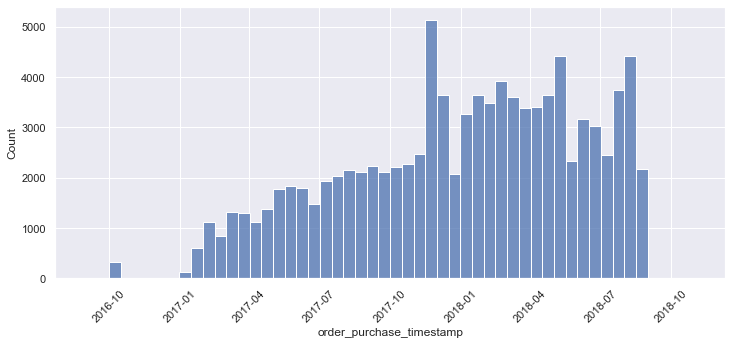

In [17]:
plt.subplots(figsize=(12,5))
sns.histplot(orders_df, x = 'order_purchase_timestamp', bins = 52, 
             binrange=(dates.date2num(datetime.datetime(2016,9,1)),dates.date2num(datetime.datetime(2018,10,31))))
plt.xticks(rotation = 45)
plt.show()

### 4.1.2 Sélection des Données pour la Simulation

In [91]:
#start_date = datetime.datetime(2017,7,17)
#end_date = datetime.datetime(2018,7,17)
start_date = datetime.datetime(2017,11,6)
end_date = datetime.datetime(2018,8,12)
print(start_date.isocalendar())
print(end_date.isocalendar())
print(f"Number of Weeks in the Dataset: {((end_date-start_date).days + 1) / 7}")

datetime.IsoCalendarDate(year=2017, week=45, weekday=1)
datetime.IsoCalendarDate(year=2018, week=32, weekday=7)
Number of Weeks in the Dataset: 40.0


In [92]:
select = (orders_df['order_purchase_timestamp'] >= start_date) & (orders_df['order_purchase_timestamp'] <= end_date)
orders_df = orders_df[select]
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62081 entries, 1 to 99432
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   customer_unique_id        62081 non-null  object        
 1   order_purchase_timestamp  62081 non-null  datetime64[ns]
 2   order_payment_total       62081 non-null  float64       
 3   review_score              62081 non-null  float64       
 4   week_count                62081 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 2.8+ MB


In [93]:
print("Premier Date d'Achât:\t\t", orders_df['order_purchase_timestamp'].min())
print("Dernier Date d'Achât:\t\t", orders_df['order_purchase_timestamp'].max())

Premier Date d'Achât:		 2017-11-13 00:07:07
Dernier Date d'Achât:		 2018-08-11 23:56:26


### 4.1.3 Division des Commandes en Semaines

In [94]:
orders_df['week_count'] = (orders_df['order_purchase_timestamp'] - start_date).dt.days.apply(lambda x: x // 7)
orders_df.describe()

,order_payment_total,review_score,week_count
count,62081.000000,62081.000000,62081.000000
mean,160.488174,4.040646,19.612635
std,212.638336,1.375910,11.383241
min,10.890000,1.000000,1.000000
25%,62.440000,4.000000,10.000000
50%,106.900000,5.000000,19.000000
75%,178.080000,5.000000,29.000000
max,7274.880000,5.000000,39.000000


In [95]:
orders_dict = {}
customers_dict = {}
#group initial contient les premiers 'delta' semaines
delta = 34
final_week = orders_df['week_count'].max()
for i in range(final_week+1):
    set_name = "Set"+str(i+1).zfill(3)
    orders_dict[set_name] = orders_df[orders_df['week_count'] == i]
    if i >= delta-1:
        select_list = [(orders_df['week_count'] <= i) & (orders_df['week_count'] > (i-delta)),
                       (orders_df['week_count'] <= i)]
        name_list = ["Sliding_", "Growing_"]
        for name,select in zip(name_list,select_list) :
            customers_dict[name + set_name] = orders_to_customers(orders_df[select], 'customer_unique_id', 
                                                                  avg_columns = ['order_payment_total', 'review_score'],
                                                                  max_columns = ['order_purchase_timestamp']).rename(
                                                                  columns={'order_purchase_timestamp':'recency'})

In [96]:
customers_dict["Sliding_Set"+str(delta).zfill(3)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51452 entries, 0 to 51451
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   customer_unique_id   51452 non-null  object        
 1   order_payment_total  51452 non-null  float64       
 2   review_score         51452 non-null  float64       
 3   recency              51452 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.0+ MB


In [97]:
#customers_dict["Growing_Set041"].info()

## 4.2 Modélisation

### 4.2.1 Création du Préprocesseur

In [98]:
daysfromlastdate_transformer.fit_transform(customers_dict["Sliding_Set"+str(delta).zfill(3)][['recency']])

,recency
0,-53.0
1,-56.0
2,-229.0
3,-87.0
4,-72.0
...,...
51447,-196.0
51448,-186.0
51449,-82.0
51450,-203.0


In [99]:
standardscale_features = ['review_score']
log1pscale_features = ['order_payment_total']
logscale_features = []
daysfromlastdate_features = ['recency']
passthrough_features = []
all_features = logscale_features + log1pscale_features + standardscale_features + daysfromlastdate_features + \
               passthrough_features
preprocessor_X = create_preprocessor_X(logscale_features = logscale_features, 
                                       standardscale_features = standardscale_features,
                                       log1pscale_features = log1pscale_features,
                                       daysfromlastdate_features = daysfromlastdate_features)
preprocessor_X0 = create_preprocessor_X(logscale_features = logscale_features, 
                                       standardscale_features = standardscale_features,
                                       log1pscale_features = log1pscale_features,
                                       daysfromlastdate_features = daysfromlastdate_features)

In [100]:
preprocessor_X_test = create_preprocessor_X(logscale_features = logscale_features, 
                                            standardscale_features = standardscale_features,
                                            log1pscale_features = log1pscale_features,
                                            daysfromlastdate_features = daysfromlastdate_features)
customers_df = customers_dict["Sliding_Set"+str(delta).zfill(3)]
X = customers_df[all_features].dropna().copy()
X_scaled = preprocessor_X_test.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index = X.index, columns = X.columns).astype(float)
X_scaled.describe()

,order_payment_total,review_score,recency
count,5.145200e+04,5.145200e+04,5.145200e+04
mean,9.175933e-16,5.231159e-16,-5.026774e-17
std,1.000010e+00,1.000010e+00,1.000010e+00
min,-2.811617e+00,-2.164472e+00,-1.698691e+00
25%,-7.018746e-01,-7.255414e-01,-8.263578e-01
50%,-3.782414e-02,7.133894e-01,8.544385e-04
75%,5.945248e-01,7.133894e-01,8.581471e-01
max,5.033054e+00,7.133894e-01,1.775601e+00


## 4.3 Modélisation

In [101]:
n_clusters=4
km = KMeans(n_clusters=n_clusters,n_init=20)
prepro = preprocessor_X
model = build_model(km, prepro)

### 4.3.1 Création des Labels et Computation du ARI

In [102]:
offset = 0
initial_set = delta + offset
initial_set_key = "Growing_Set"+str(initial_set).zfill(3)

score_dict = creation_des_labels(customers_dict, initial_set_key, all_features, model)

In [103]:
sliding_score = []
growing_score = []
week_number = []
for i in range(initial_set, final_week + 1):
    sliding_score.append(score_dict["Sliding_Set"+str(i).zfill(3)])
    growing_score.append(score_dict["Growing_Set"+str(i).zfill(3)])
    week_number.append(i-initial_set)

In [104]:
b = sp.optimize.curve_fit(exp_decay, week_number, growing_score)[0][0]
growing_score_fit = [exp_decay(x, b) for x in week_number]
print(1/b)
for decay_limit in [0.95, 0.9, 0.85, 0.8, 0.5] :
    print(f'Decay time to {decay_limit:.2f}:', round(np.log(1/decay_limit)/b, 2))

18.889653281574848
Decay time to 0.95: 0.97
Decay time to 0.90: 1.99
Decay time to 0.85: 3.07
Decay time to 0.80: 4.22
Decay time to 0.50: 13.09


In [105]:
b = sp.optimize.curve_fit(exp_decay, week_number, sliding_score)[0][0]
sliding_score_fit = [exp_decay(x, b) for x in week_number]
print(1/b)
for decay_limit in [0.95, 0.9, 0.85, 0.8, 0.5] :
    print(f'Decay time to {decay_limit:.2f}:', round(np.log(1/decay_limit)/b, 2))

58.162621985775054
Decay time to 0.95: 2.98
Decay time to 0.90: 6.13
Decay time to 0.85: 9.45
Decay time to 0.80: 12.98
Decay time to 0.50: 40.32


Text(0.5, 0, 'Nombre de Semaines')

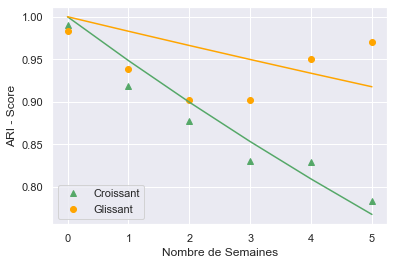

In [106]:
plt.plot(week_number, growing_score, 'g^', label='Croissant')
plt.plot(week_number, sliding_score, marker='o', ls='', color='orange',  label='Glissant')
plt.plot(week_number, growing_score_fit, 'g-')
plt.plot(week_number, sliding_score_fit, marker=None, color='orange')
plt.legend()
plt.ylabel('ARI - Score')
plt.xlabel('Nombre de Semaines')
#plt.ylim(0.6,1.01)
#plt.xlim(0,12)